In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/diabetes_data.csv")
df = df.drop_duplicates()
print(df.head())

    Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0     

In [3]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000
mean,8.607420,0.455983,0.539550,0.973211,30.178554,0.490706,0.159950,0.678366,0.590862,0.771587,0.046345,2.921103,4.130537,6.385020,0.277007,0.068510,0.581756,0.521681
std,2.860717,0.498063,0.498437,0.161466,7.287730,0.499918,0.366563,0.467107,0.491679,0.419813,0.210233,1.107991,8.466301,10.368493,0.447524,0.252621,0.493275,0.499534
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_features = list(df.columns)
print(df_features)

['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


In [5]:
print((df[df_features]==0).sum())
print((df[df_features]=="NaN").sum())

Age                         0
Sex                     34828
HighChol                29478
CholCheck                1715
BMI                         0
Smoker                  32605
HeartDiseaseorAttack    53780
PhysActivity            20591
Fruits                  26193
Veggies                 14623
HvyAlcoholConsump       61053
GenHlth                     0
MentHlth                41555
PhysHlth                33432
DiffWalk                46286
Stroke                  59634
HighBP                  26776
Diabetes                30622
dtype: int64
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabe

In [6]:
#print((df[X.columns]).isNull().sum())
print(df[df_features].isnull().sum())
print(df.shape)
df = df.dropna(axis = 0)
print(df.shape)
#print(X)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64
(64020, 18)
(64020, 18)


In [7]:
print((df[df_features]==0).sum())

Age                         0
Sex                     34828
HighChol                29478
CholCheck                1715
BMI                         0
Smoker                  32605
HeartDiseaseorAttack    53780
PhysActivity            20591
Fruits                  26193
Veggies                 14623
HvyAlcoholConsump       61053
GenHlth                     0
MentHlth                41555
PhysHlth                33432
DiffWalk                46286
Stroke                  59634
HighBP                  26776
Diabetes                30622
dtype: int64


In [8]:
print(df.max())

Age                     13.0
Sex                      1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Stroke                   1.0
HighBP                   1.0
Diabetes                 1.0
dtype: float64


In [9]:
print(df.min())

Age                      1.0
Sex                      0.0
HighChol                 0.0
CholCheck                0.0
BMI                     12.0
Smoker                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             0.0
Fruits                   0.0
Veggies                  0.0
HvyAlcoholConsump        0.0
GenHlth                  1.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Stroke                   0.0
HighBP                   0.0
Diabetes                 0.0
dtype: float64


In [12]:
print(df.max() - df.min())

Age                     12.0
Sex                      1.0
HighChol                 1.0
CholCheck                1.0
BMI                     86.0
Smoker                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
GenHlth                  4.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Stroke                   1.0
HighBP                   1.0
Diabetes                 1.0
dtype: float64


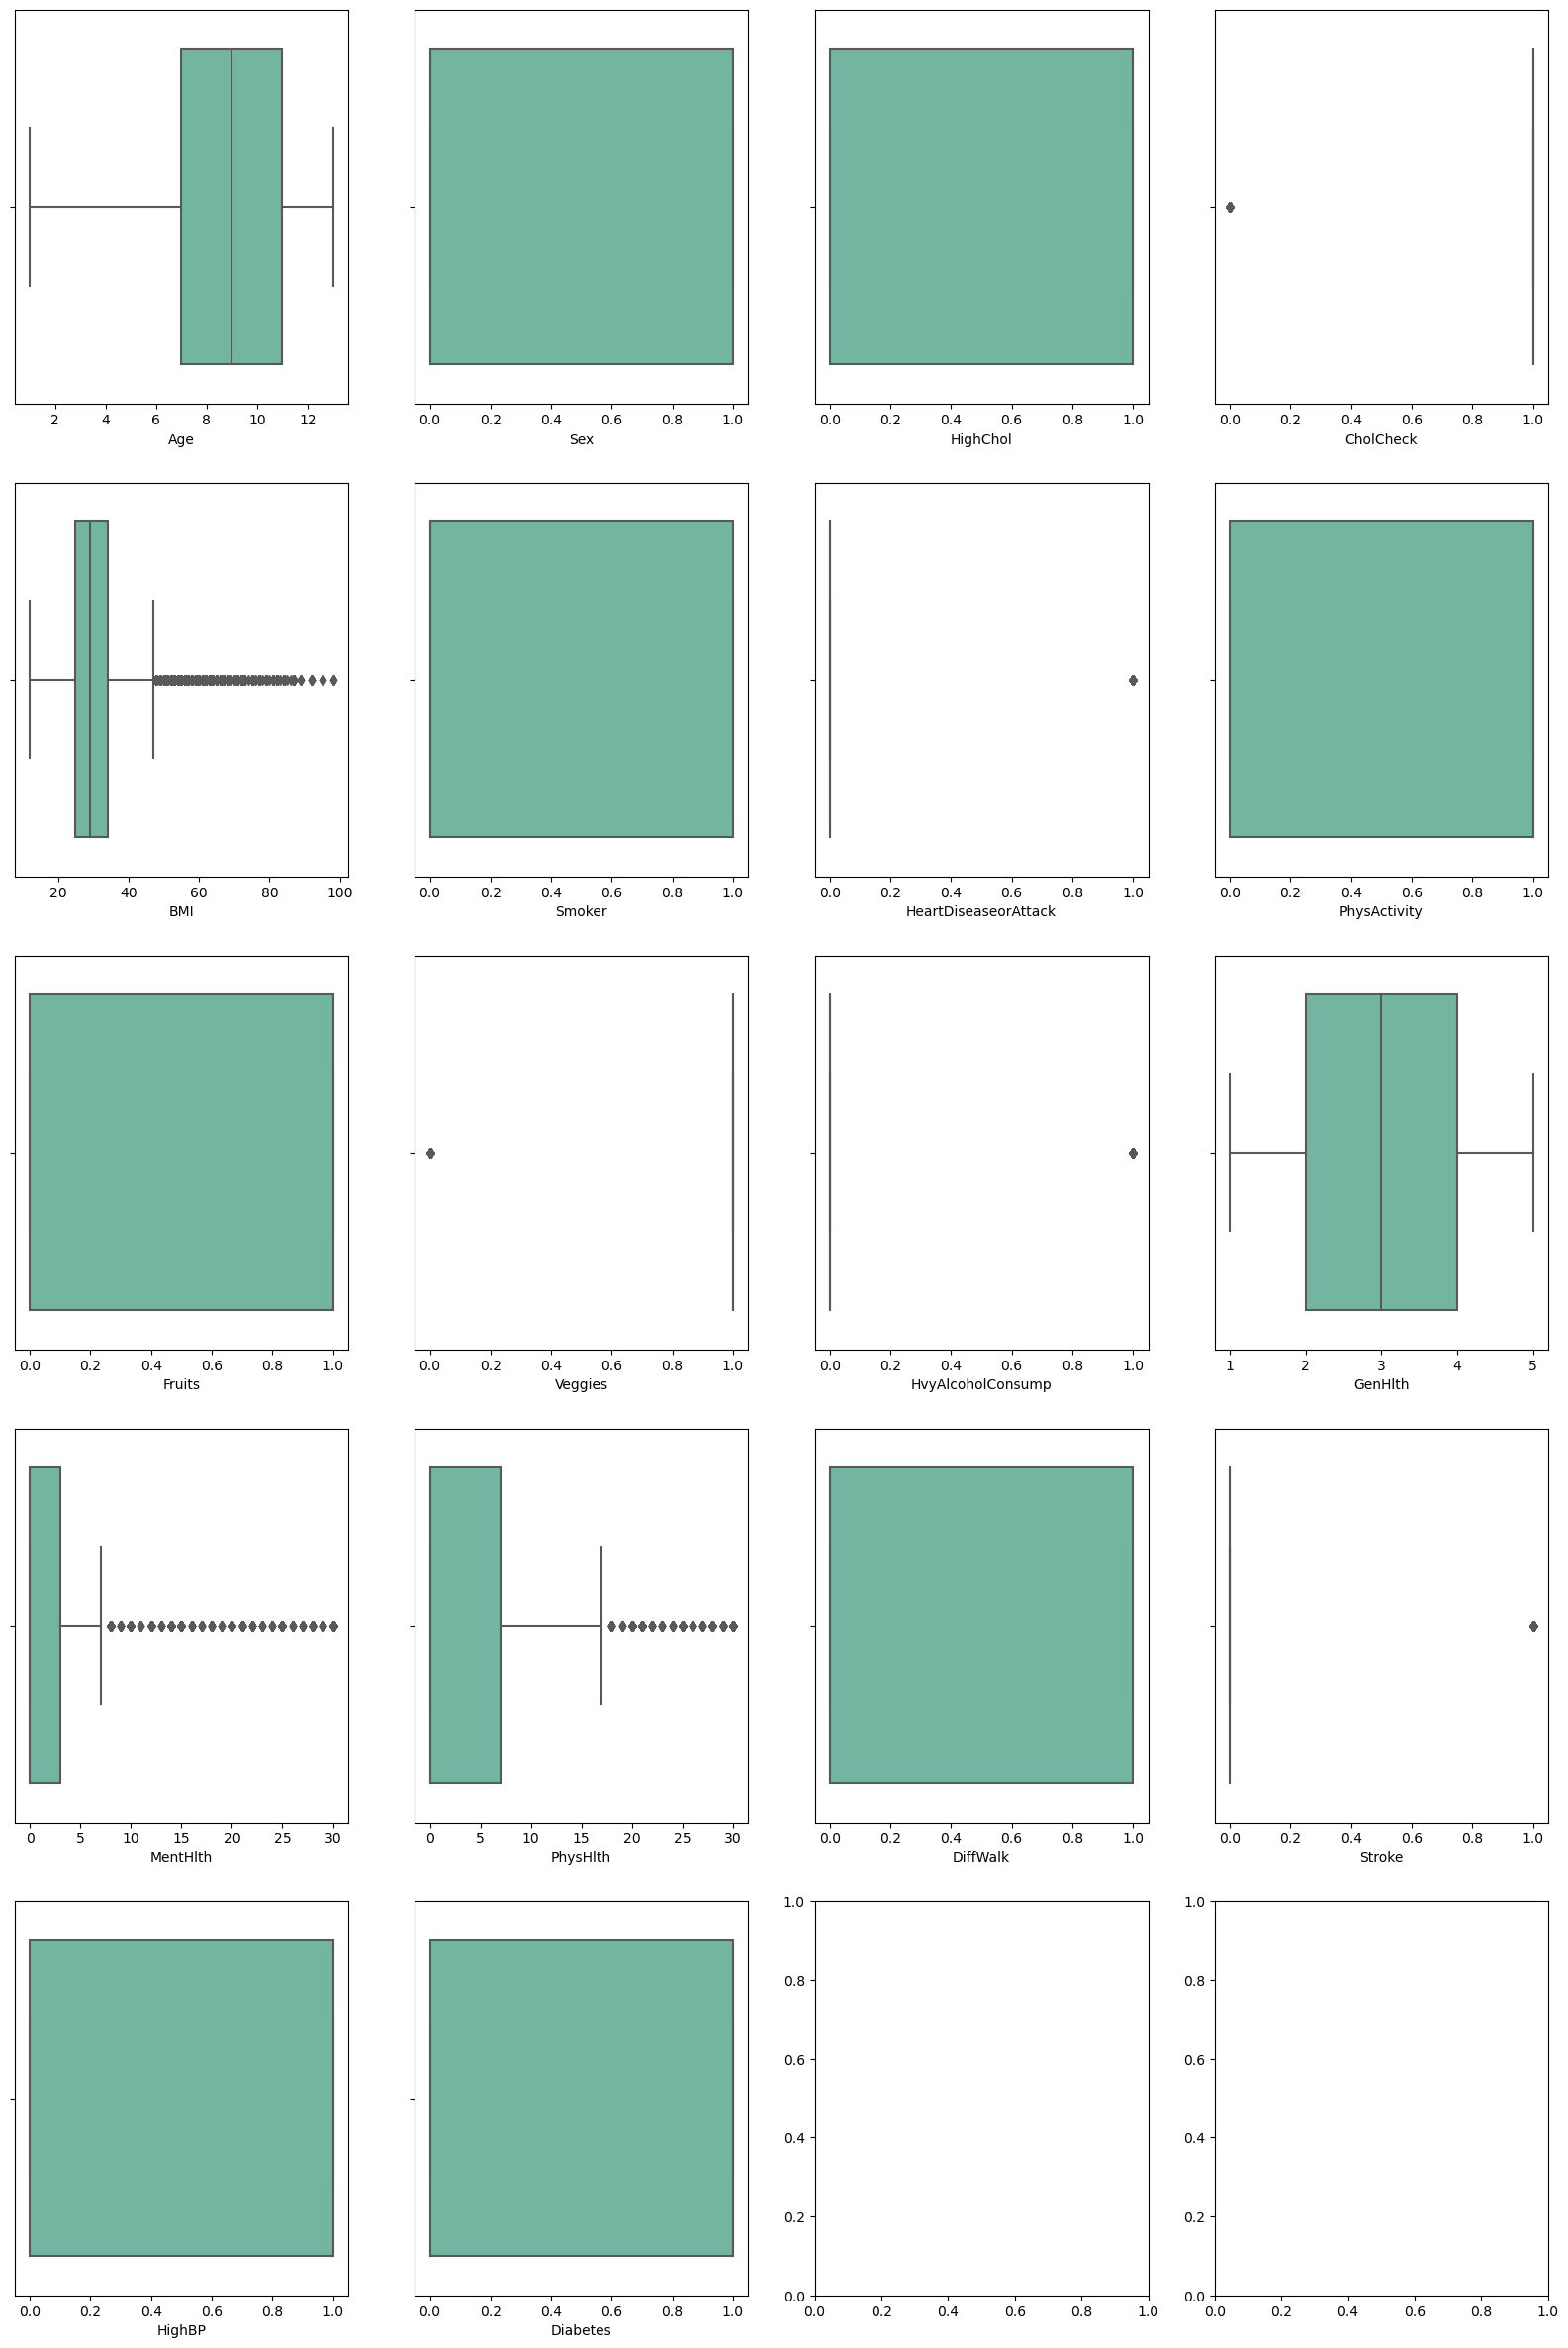

In [13]:
fig, axes = plt.subplots(5,4, figsize=(20,30))
x_,y_ = 0,0
for i, column in enumerate(df.columns[:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7: 
        x_ = 2
        y_ = 0
    elif i == 11: 
        x_ = 3
        y_ = 0
    elif i == 15: 
        x_ = 4
        y_ = 0
    else:
        y_ += 1

In [14]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_01 = pd.DataFrame(data=dat, columns=cols)  
print(df_01.head())

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')
        Age  Sex  HighChol  CholCheck       BMI  Smoker  HeartDiseaseorAttack  \
0  0.250000  1.0       0.0        1.0  0.162791     0.0                   0.0   
1  0.916667  1.0       1.0        1.0  0.162791     1.0                   0.0   
2  1.000000  1.0       0.0        1.0  0.162791     0.0                   0.0   
3  0.833333  1.0       1.0        1.0  0.186047     1.0                   0.0   
4  0.583333  0.0       0.0        1.0  0.197674     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0     0.50  0.166667   
1           0.0     1.0      0.0                0.0     0.50  0.000000   
2           1.0     1.0

In [15]:
print(df_01.max() - df_01.min())

Age                     1.0
Sex                     1.0
HighChol                1.0
CholCheck               1.0
BMI                     1.0
Smoker                  1.0
HeartDiseaseorAttack    1.0
PhysActivity            1.0
Fruits                  1.0
Veggies                 1.0
HvyAlcoholConsump       1.0
GenHlth                 1.0
MentHlth                1.0
PhysHlth                1.0
DiffWalk                1.0
Stroke                  1.0
HighBP                  1.0
Diabetes                1.0
dtype: float64


In [17]:
x = df_01.drop(["Diabetes"], axis =1);
y = df_01["Diabetes"]
print(y.value_counts())

1.0    33398
0.0    30622
Name: Diabetes, dtype: int64


(array([30622.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 33398.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

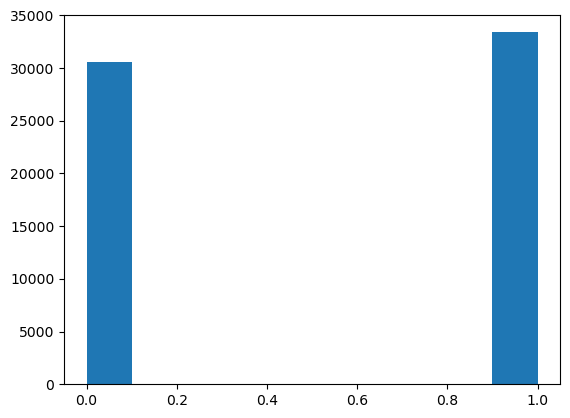

In [18]:
plt.hist(y)

1.0    32233
0.0    30622
Name: Diabetes, dtype: int64


(array([30622.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

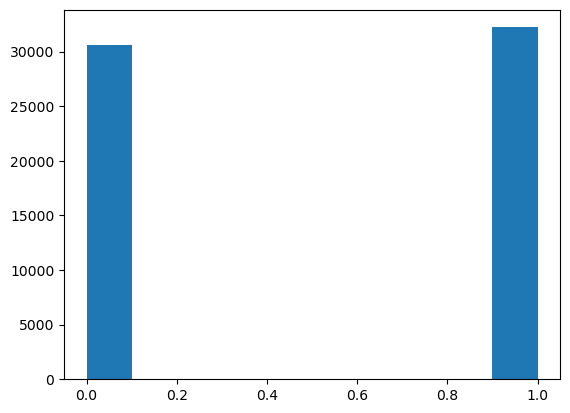

In [26]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.95, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    32233
1.0    32233
Name: Diabetes, dtype: int64


(array([32233.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

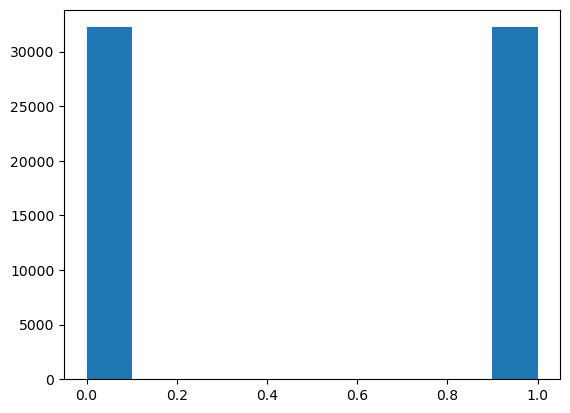

In [27]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [28]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  62.866
Standed deviation :  0.123
CV value :  3
Parameters :  {}
Accuracy :  62.783
Standed deviation :  0.333
CV value :  4
Parameters :  {}
Accuracy :  62.518
Standed deviation :  0.829
CV value :  5
Parameters :  {}
Accuracy :  62.738
Standed deviation :  1.080


In [29]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  73.688
Standed deviation :  0.313
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  73.764
Standed deviation :  0.458
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  73.825
Standed deviation :  0.317
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  73.783
Standed deviation :  0.422


In [30]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 17}
Accuracy :  70.896
Standed deviation :  0.180
CV value :  3
Parameters :  {'n_neighbors': 17}
Accuracy :  70.988
Standed deviation :  0.467
CV value :  4
Parameters :  {'n_neighbors': 17}
Accuracy :  71.099
Standed deviation :  0.467
CV value :  5
Parameters :  {'n_neighbors': 17}
Accuracy :  71.368
Standed deviation :  0.617


In [31]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  73.324
Standed deviation :  0.259
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  73.388
Standed deviation :  0.300
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  73.380
Standed deviation :  0.369
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  73.417
Standed deviation :  0.347


In [32]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  68.042
Standed deviation :  0.195
CV value :  3
Parameters :  {}
Accuracy :  68.085
Standed deviation :  0.492
CV value :  4
Parameters :  {}
Accuracy :  68.098
Standed deviation :  0.441
CV value :  5
Parameters :  {}
Accuracy :  68.068
Standed deviation :  0.477


In [33]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'linear'}
Accuracy :  73.287
Standed deviation :  0.144
CV value :  3
Parameters :  {'kernel': 'linear'}
Accuracy :  73.349
Standed deviation :  0.302
CV value :  4
Parameters :  {'kernel': 'linear'}
Accuracy :  73.391
Standed deviation :  0.399
CV value :  5
Parameters :  {'kernel': 'linear'}
Accuracy :  73.355
Standed deviation :  0.407


In [34]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 300, 'max_features': 2, 'n_estimators': 300}
Accuracy :  70.737
Standed deviation :  0.039
CV value :  3
Parameters :  {'max_depth': 300, 'max_features': 3, 'n_estimators': 200}
Accuracy :  70.429
Standed deviation :  0.165
CV value :  4
Parameters :  {'max_depth': 150, 'max_features': 4, 'n_estimators': 300}
Accuracy :  70.360
Standed deviation :  0.766
CV value :  5
Parameters :  {'max_depth': 100, 'max_features': 3, 'n_estimators': 300}
Accuracy :  70.370
Standed deviation :  0.801
